### 볼린저 밴드 
1. 파일 로드 
2. 결측치와 이상치를 확인 및 제거 
3. 시간과 종가만의 데이터프레임으로 변경
4. 이동 평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수에 대입
5. 상단 밴드 : 이동 평균선 + (2 * 데이터 20개의 표준편차)
6. 하단 밴드 : 이동 평균선 - (2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태를 입력
9. 수익율 계산

In [3]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("../csv/BND.csv", index_col='Date')
df.head()

In [4]:
## 결측치와 이상치를 확인
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
## 결측치와 이상치를 제외한 데이터 생성
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [10]:
## 시간과 종가만으로 이루어져있는 데이터프레임 생성

# price_df = df.loc[ : , ["Adj Close"]]

price_df = df[["Adj Close"]]

In [20]:

def bol(x):
    # if i >= 19:
    #     result = price_df.iloc[i-19:i].mean()
    #     return result
    i += 1
    print(i , end = " ")

price_df.apply(bol)

UnboundLocalError: local variable 'i' referenced before assignment

In [16]:
## 이동 평균선
# 데이터양이 20개의 평균을 구해서 새로운 파생변수 대입
# 과거의 데이터의 수가 20개가 되지 않으면 결측치로 출력

price_df["center"] = price_df['Adj Close'].rolling(20).mean()

C:\Users\moons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
2007-05-04,51.679100,NaN
2007-05-07,51.713379,51.556713
2007-05-08,51.720268,51.566542
2007-05-09,51.658497,51.580130
2007-05-10,51.706562,51.596464
2007-05-11,51.637943,51.613477
2007-05-14,51.603649,51.626378


In [22]:
## ub 파생변수를 생성 
## 이동평균선 + (2 * 종가 데이터 20개의 표준편차)
price_df["ub"] = \
    price_df["center"] + ( 2 * price_df["Adj Close"].rolling(20).std() )

C:\Users\moons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
## lb 파생변수 생성
# 이동평균선 - ( 2 * 종가 데이터 20개의 표준편차 )
price_df["lb"] = \
    price_df['center'] - ( 2 * price_df['Adj Close'].rolling(20).std() )

C:\Users\moons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
2007-05-04,51.679100,NaN,NaN,NaN
2007-05-07,51.713379,51.556713,51.807910,51.305517
2007-05-08,51.720268,51.566542,51.827492,51.305592
2007-05-09,51.658497,51.580130,51.829713,51.330546
2007-05-10,51.706562,51.596464,51.833301,51.359627
2007-05-11,51.637943,51.613477,51.804375,51.422579
2007-05-14,51.603649,51.626378,51.770106,51.482650


<AxesSubplot:xlabel='Date'>

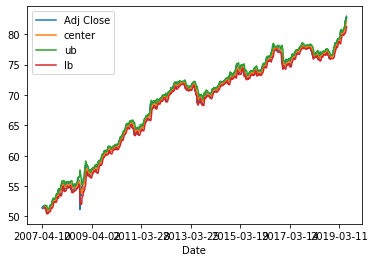

In [25]:
price_df.plot()

In [ ]:
## 시작 시간 생성 
start_time = '2010-01-02'
price_df_2 = price_df.loc[start_time:]
price_df_2.head(3)

In [27]:
## 거래 내역이라는 파생변수 생성
## 비어있는 값을 생성
price_df_2['trade'] = ""
price_df_2.head(2)


C:\Users\moons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj Close,center,ub,lb,trade
Date,,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793,
2010-01-05,60.789135,60.819153,61.325461,60.312844,
